# Machine Learning for Regression 

In [1]:
import pandas as pd 
import numpy as np 

## Data Preparation

In [2]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv'

In [3]:
df = pd.read_csv(url)
df.head(2)

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


In [4]:
# Lower case and add an underscore to the columns' headers
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [5]:
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650


We want to apply the same transformation to the values of columns with dtype == object.

In [6]:
# returns a series with an index (make, model, etc...) and a value (object, object, etc...)
df.dtypes[df.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [7]:
# We want to access the indexes
strings = list(df.dtypes[df.dtypes == 'object'].index)
strings

['make',
 'model',
 'engine_fuel_type',
 'transmission_type',
 'driven_wheels',
 'market_category',
 'vehicle_size',
 'vehicle_style']

In [8]:
for col in strings:
    df[col]= df[col].str.lower().str.replace(' ', '_') 

In [9]:
df.head()

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


## Exploratory Data Analysis

In [10]:
for col in df.columns:
    print(col)
    print(df[col].unique()[:5]) # see first 5 unique values
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

**Distribution of price**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 

%matplotlib inline

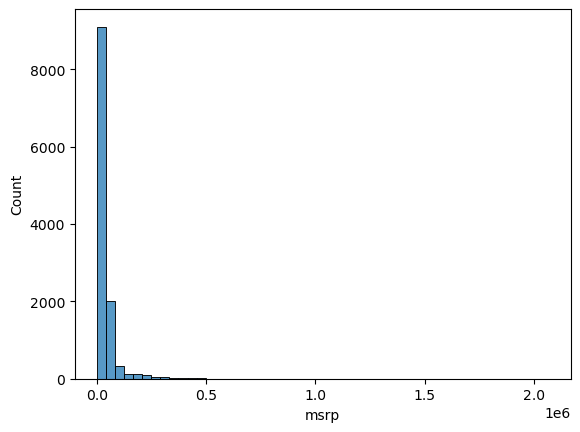

In [12]:
sns.histplot(df['msrp'], bins = 50)
plt.show()

Most of the cars price are in the left side of the **long tail** distribution.

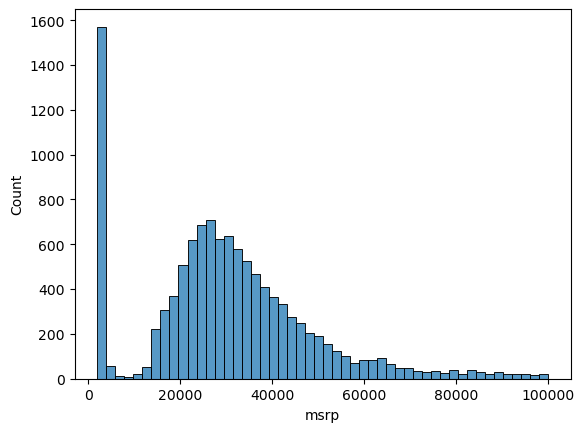

In [13]:
sns.histplot(df['msrp'][df['msrp'] < 100000], bins = 50)
plt.show()

This is a common distribution for prices, where most of the products / services are cheap. This **long tail** distribution is not very good to train machine learning models. 

To get rid of this, we apply a **logarithmic** distribution.
    - For large values, the value of the logarithmic is not that large. There's not much of an increase in from one log to another.
    - **Problem:** It complains if it has zeros --> use **np.log1p()** to +1 all the values and guarantee there are no zeros.

In [14]:
price_logs = np.log1p(df.msrp)

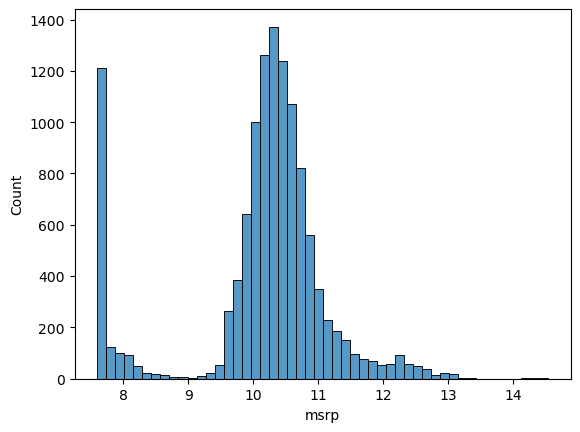

In [15]:
sns.histplot(price_logs, bins=50)
plt.show()

The distribution it's more similar to a normal distribution (which favors our model), in spite of that pike on the left side. 

**Missing Values**

In [16]:
df.isnull().sum()[df.isnull().sum()>0]

engine_fuel_type       3
engine_hp             69
engine_cylinders      30
number_of_doors        6
market_category     3742
dtype: int64

## Setting up the validation framework

In [17]:
n = len(df)

n_val = int(n * 0.2) # number of rows for the validation data set
n_test = int(n * 0.2) # number of rows for the test data set
n_train = n - n_val - n_test # number of rows for the train data set

In [18]:
# check if the split matches the entire data frame
n, n_val+n_test+n_train

(11914, 11914)

Now that the size for each split of the data set is decided, the next step is to shuffle the data frame.

In [19]:
np.random.seed(4) # to make the results reproducable

In [20]:
idx = np.arange(n)
idx # save our index numbers in a variable

array([    0,     1,     2, ..., 11911, 11912, 11913])

In [21]:
np.random.shuffle(idx)
idx

array([10256, 10790,  7447, ..., 10679,  8366,  1146])

Using **.iloc** we can get the first n-rows of our shuffled index

In [22]:
df.iloc[idx[:5]]

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10256,chevrolet,tahoe,2015,flex-fuel_(unleaded/e85),355.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,4dr_suv,22,16,1385,49300
10790,subaru,tribeca,2013,regular_unleaded,256.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,21,16,640,32595
7447,toyota,paseo,1997,regular_unleaded,93.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,34,26,2031,2000
9389,gmc,sierra_1500,2017,regular_unleaded,355.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,22,16,549,47690
515,bmw,5_series,2015,premium_unleaded_(required),443.0,8.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",large,sedan,25,16,3916,67200


In [23]:
df.iloc[:n_train].head(5) # compare the n_train split w/o the shuffled indexes vs...

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650
2,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,high-performance",compact,coupe,28,20,3916,36350
3,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,coupe,28,18,3916,29450
4,bmw,1_series,2011,premium_unleaded_(required),230.0,6.0,manual,rear_wheel_drive,2.0,luxury,compact,convertible,28,18,3916,34500


In [24]:
df.iloc[idx[:n_train]].head(5) # ... shuffled indexes

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10256,chevrolet,tahoe,2015,flex-fuel_(unleaded/e85),355.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,4dr_suv,22,16,1385,49300
10790,subaru,tribeca,2013,regular_unleaded,256.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,21,16,640,32595
7447,toyota,paseo,1997,regular_unleaded,93.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,34,26,2031,2000
9389,gmc,sierra_1500,2017,regular_unleaded,355.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,22,16,549,47690
515,bmw,5_series,2015,premium_unleaded_(required),443.0,8.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",large,sedan,25,16,3916,67200


In [25]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

In [26]:
df_train.head(5)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
10256,chevrolet,tahoe,2015,flex-fuel_(unleaded/e85),355.0,8.0,automatic,four_wheel_drive,4.0,flex_fuel,large,4dr_suv,22,16,1385,49300
10790,subaru,tribeca,2013,regular_unleaded,256.0,6.0,automatic,all_wheel_drive,4.0,crossover,midsize,4dr_suv,21,16,640,32595
7447,toyota,paseo,1997,regular_unleaded,93.0,4.0,manual,front_wheel_drive,2.0,NaN,compact,coupe,34,26,2031,2000
9389,gmc,sierra_1500,2017,regular_unleaded,355.0,8.0,automatic,four_wheel_drive,4.0,NaN,large,crew_cab_pickup,22,16,549,47690
515,bmw,5_series,2015,premium_unleaded_(required),443.0,8.0,automatic,all_wheel_drive,4.0,"luxury,high-performance",large,sedan,25,16,3916,67200


In [27]:
# Drop old indexes
df_train.reset_index(inplace = True, drop = True)
df_val.reset_index(inplace = True, drop = True)
df_test.reset_index(inplace = True, drop = True)

Let's apply the logarithmic function to the target variable on the different data sets.

In [28]:
# test
np.log1p(df_train.msrp.values)

array([10.80569964, 10.39194486,  7.60140233, ..., 10.7166597 ,
       11.47523398,  7.60140233])

In [29]:
y_train = np.log1p(df_train['msrp'].values)

y_val = np.log1p(df_val['msrp'].values)

y_test = np.log1p(df_test['msrp'].values)

Finally, let's drop the non-logarithmic values of MSRP from the data sets to avoid using them during the rest of our analysis.

In [30]:
del df_train['msrp']

del df_val['msrp']

del df_test['msrp']

## Linear Regression

Linear regression is a model to predict a continuous variable. Let's take our ML model:

$$
g(\mathbf{X}) \approx \mathbf{y}
$$

For now, let's look at a single observation:

$$
g(\mathbf{x}_i) \approx y_i
$$

The vector $\mathbf{x}_i$ is:

$$
\mathbf{x}_i = \begin{bmatrix} x_{i1} & x_{i2} & \dotsb & x_{iN} \end{bmatrix}
$$

and the corresponding $y_i$:

$$
y_i = g(\begin{bmatrix} x_{i1} & x_{i2} & \dotsb & x_{iN} \end{bmatrix})
$$

For example purposes, let's look at a specific row and select the variables engine_hp, city_mpg and popularity.

In [31]:
df_train.iloc[10]

make                         chevrolet
model                         cavalier
year                              2003
engine_fuel_type      regular_unleaded
engine_hp                        140.0
engine_cylinders                   4.0
transmission_type               manual
driven_wheels        front_wheel_drive
number_of_doors                    4.0
market_category                    NaN
vehicle_size                   compact
vehicle_style                    sedan
highway_mpg                         30
city_mpg                            22
popularity                        1385
Name: 10, dtype: object

In [32]:
xi = [140, 22, 1385]

In [33]:
# Randomly assign values to the coefficients

w0 = 7.17
w = [0.01, 0.04, 0.002]

What the coefficients tell us is that if we didn't know anything about the car, the predicted **log price** would be 7.17

In [34]:
def linear_regression(xi):
    n = len(xi) # number of features
    
    pred = w0 # intersect value
    
    for j in range(n):
        pred = pred + w[j]*xi[j]
        
    return pred 

In [35]:
linear_regression(xi)

12.22

The result is the value of log(y+1) because of the use of **np.log1p()** function. To "undo", we calculate the exponential using **np.expm1**

In [36]:
np.expm1(12.22)

202803.95837882365

The predicted price for a chevrolet cavalier with an engine_hp of 140, a city_mpg of 22 a popularity score of 1385 is 202.804 USD

In [37]:
# Shortcut to achieve the same result
round (np.expm1(linear_regression(xi)), 2)

202803.96

**Coefficient's interpretation**

w0 is the value that we predict for a car, if we don't know nothing about its caractheristics. It is the bias term

w1 == for each aditional horsepower, the car's price increases by 0.01

w2 == for every extra mile per gallon, the price is increased by 0.04

w3 == the more popular the car is, the price is affect by 0.002. Which does not have a big influence

## Linear Regression - vector form

We can write the linear regression equation in vector form:

$$
g(\mathbf{x_i}) = \begin{bmatrix} 1 & x_{i1} & x_{i2} & x_{i3} \end{bmatrix} \begin{bmatrix} w_0 \\ w_1 \\ w_2 \\ w_3 \end{bmatrix} = \langle \mathbf{x}_i, \mathbf{w}_i \rangle = \mathbf{x}_i^T \mathbf{w}_i
$$


- Linear Regression Formula: g(xi) = w0 + w1 * xi1 + w2 * xi2 + w3 * xi3 + .... + wj * xij

-  g(xi) = w0 + Σ(wj.xij)

- Σ(wj.xij) this part of the equation is a **dot product** (which was already covered), a vector-vector multiplication

Start by creating a function for the vector-vector multiplication

In [38]:
def dot(xi, w):
    n = len(xi)
    
    result = 0
    
    for j in range(n):
        result = result + xi[j] * w[j]
    
    return result

By writting the product between the coefficients and their respetive features, it is possible to write a shorter version for the linear regression function

In [39]:
def linear_regression(xi):
    return w0 + dot(xi, w)

To make it more simple, we add 1 to the features vector and create a new vector for the coefficients with w0 in it.

In [40]:
w_new = [w0] + w # the brackets in w0 append the value to the list [w]

def linear_regression(xi):
    
    xi = [1] + xi # Add 1 to the features matrix, to multiply with the w0 coefficient
    
    return dot(xi, w_new)

In [41]:
np.expm1(linear_regression(xi))

202803.95837882365

---

Generalizing for multiple observations, X now becomes a matrix of size m * n where n is the number of features and m is the number of observations. Each row of X is an observation.

We can now multiply X with W to get our predictions

$$
\mathbf{X} \mathbf{w} =

\begin{bmatrix} 1 & x_{11} & x_{12} & \dots & n_{1n} 
             \\ 1 & x_{21} & x_{22} & \dots & x_{2n} \\ 
             \\ \vdots & \vdots & \vdots & \ddots & \vdots \\ 
             \\ 1 & x_{m1} & x_{m2} & \dots & x_{mn} \\ 
\end{bmatrix}

\begin{bmatrix}
w_0 \\ w_1 \\ \vdots \\ w_m
\end{bmatrix} = 

\begin{bmatrix}
\mathbf{x}_1^T \mathbf{w} \\ \mathbf{x}_2^T \mathbf{w} \\ \vdots \\ \mathbf{x}_m^T \mathbf{w}
\end{bmatrix} 

$$

The resulting vector Ŷ is the prediction vector.

Given that, Linear Regression can be written with the notation of a **matrix-vector** multiplication

In [42]:
'''Let's gather 3 observations and put them into a matrix X'''

x1 = [1, 148, 24, 1385]
x2 = [1, 132, 25, 2031]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]  # list of lists

X = np.array(X) # turn list of list into a matrix

X

array([[   1,  148,   24, 1385],
       [   1,  132,   25, 2031],
       [   1,  453,   11,   86]])

In [43]:
# The result of X.dot(features_vector) are the predictions using a matrix-vector multiplication

X.dot(w_new)

array([12.38 , 13.552, 12.312])

In [44]:
def linear_regression(X):
    
    '''new function without adding 1 to the feature matrix 
    because we did it in the previous step
    '''
    return X.dot(w_new)

In [48]:
np.expm1(linear_regression(X))

array([237992.82334859, 768348.51018973, 222347.22211011])

## Training a Linear Regression model

In the previous STEPS, we built a function to make predictions using weights and a feature matrix. But how do we find these weights?

Ideally, we want our model $g(\mathbf{X})$ to match $y$, but since that is usually not possible, we try to approximate it instead. 

$$
g(\mathbf{X}) \approx y
$$

Our model is defined as:

$$
g(\mathbf{X}) = \mathbf{X} \mathbf{w}
$$

This gives the equation:

$$
\mathbf{y} \approx \mathbf{X} \mathbf{w}
$$

If $\mathbf{X}$ were invertible, we could solve for $\mathbf{w}$ by left-multiplying by $\mathbf{X}^{-1}$:

$$
\mathbf{w} \approx \mathbf{X}^{-1} \mathbf{y}
$$

However, $\mathbf{X}$ is typically not square and thus not invertible. To address this, we left-multiply by the transpose $\mathbf{X^T}$:

$$
\mathbf{X}^T \mathbf{X} \mathbf{w} \approx \mathbf{X}^T \mathbf{y}
$$

This forms the Gram Matrix $\mathbf{X}^T \mathbf{X}$, which is usually invertible.

$$
\underbrace{\mathbf{X}^T \mathbf{X}}_{\text{Gram Matrix}} \mathbf{w} \approx \mathbf{X}^T \mathbf{y}
$$

Since the  Gram matrix  does have an inverse, we can left-multiply by it:

$$
(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X} \mathbf{w} \approx (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

We can simplify this:

$$
\underbrace{(\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{X}}_{I} \mathbf{w} \approx (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

$$
\mathbf{w} \approx (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

This equation finds the $\mathbf{w}$ which minimizes the sum of squared errors between the data and the model. This derivation is not the proper derivation of the Normal equation that demonstrates this point.

In [49]:
# Let's use a new X matrix

X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [168, 23, 436],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 96],
    [138, 54, 185],
    [142, 25, 431],
    [453, 351, 86],
]

X = np.array(X) 
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 168,   23,  436],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   96],
       [ 138,   54,  185],
       [ 142,   25,  431],
       [ 453,  351,   86]])

In [50]:
# We need to add 1s to our matrix because of the bias term

ones = np.ones(X.shape[0]) # X.shape[0] gives us the size of the array
ones

array([1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [51]:
# Add the 1s to the X matrix
X = np.column_stack([ones, X])
X

array([[1.000e+00, 1.480e+02, 2.400e+01, 1.385e+03],
       [1.000e+00, 1.320e+02, 2.500e+01, 2.031e+03],
       [1.000e+00, 1.680e+02, 2.300e+01, 4.360e+02],
       [1.000e+00, 1.580e+02, 2.400e+01, 1.850e+02],
       [1.000e+00, 1.720e+02, 2.500e+01, 2.010e+02],
       [1.000e+00, 4.130e+02, 1.100e+01, 9.600e+01],
       [1.000e+00, 1.380e+02, 5.400e+01, 1.850e+02],
       [1.000e+00, 1.420e+02, 2.500e+01, 4.310e+02],
       [1.000e+00, 4.530e+02, 3.510e+02, 8.600e+01]])

Now let's apply **(Xᵀ · X)⁻¹ · Xᵀ · y**

- Tranpose: **(Xᵀ · X)**

In [53]:
XTX = X.T.dot(X)
XTX

array([[9.000000e+00, 1.924000e+03, 5.620000e+02, 5.036000e+03],
       [1.924000e+03, 5.370860e+05, 1.933560e+05, 7.754600e+05],
       [5.620000e+02, 1.933560e+05, 1.297940e+05, 1.555150e+05],
       [5.036000e+03, 7.754600e+05, 1.555150e+05, 6.544506e+06]])

- Inverse: **(Xᵀ · X)⁻¹**

In [54]:
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 9.44779582e-01, -3.32911063e-03,  1.30415883e-03,
        -3.63531504e-04],
       [-3.32911063e-03,  1.66682214e-05, -1.14449048e-05,
         8.58692237e-07],
       [ 1.30415883e-03, -1.14449048e-05,  1.92323834e-05,
        -1.04454345e-07],
       [-3.63531504e-04,  8.58692237e-07, -1.04454345e-07,
         3.33273037e-07]])

- **(Xᵀ · X)⁻¹ · Xᵀ**

In [55]:
XTX.dot(XTX_inv).round(1)

array([[ 1.,  0.,  0., -0.],
       [ 0.,  1.,  0., -0.],
       [-0.,  0.,  1., -0.],
       [-0.,  0., -0.,  1.]])

Let's assign random values for vector y

In [56]:
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

- **(Xᵀ · X)⁻¹ · Xᵀ · y**

In [57]:
w_full = XTX_inv.dot(X.T).dot(y)
w_full 

array([ 1.60100139e+04,  8.10377303e+00, -2.21565611e+01, -3.57023438e-02])

In [58]:
w0 = w_full[0]
w = w_full[1:]

In [59]:
w0, w

(16010.01389481148, array([  8.10377303, -22.15656115,  -0.03570234]))

w0 is the bias term, the price of the car if none of the characteristics are known. In this case, it would be 16.010 USD.

---

Now, let's put everything in a single function

In [60]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0]) # Create vector of 1s
    X = np.column_stack([ones, X]) #Add 1s to the matrix
    
    #normal equation
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    #return a tuple with the bias and the weights
    return w_full[0], w_full[1:]

## Car price baseline model

Build a model using only the numerical columns

In [63]:
df_train.dtypes[df_train.dtypes != 'object']

year                  int64
engine_hp           float64
engine_cylinders    float64
number_of_doors     float64
highway_mpg           int64
city_mpg              int64
popularity            int64
dtype: object

In [66]:
# Use a couple of these variables

base = ['engine_hp', 'engine_cylinders', 'highway_mpg',
        'city_mpg', 'popularity']

df_train[base]

,engine_hp,engine_cylinders,highway_mpg,city_mpg,popularity
0,355.0,8.0,22,16,1385
1,256.0,6.0,21,16,640
2,93.0,4.0,34,26,2031
3,355.0,8.0,22,16,549
4,443.0,8.0,25,16,3916
...,...,...,...,...,...
7145,210.0,6.0,21,15,1851
7146,300.0,6.0,27,18,1013
7147,245.0,6.0,25,19,454
7148,370.0,6.0,29,20,1715


In [67]:
# Extract the values from our filtered df_train

X_train = df_train[base].values

X_train

array([[3.550e+02, 8.000e+00, 2.200e+01, 1.600e+01, 1.385e+03],
       [2.560e+02, 6.000e+00, 2.100e+01, 1.600e+01, 6.400e+02],
       [9.300e+01, 4.000e+00, 3.400e+01, 2.600e+01, 2.031e+03],
       ...,
       [2.450e+02, 6.000e+00, 2.500e+01, 1.900e+01, 4.540e+02],
       [3.700e+02, 6.000e+00, 2.900e+01, 2.000e+01, 1.715e+03],
       [1.350e+02, 6.000e+00, 2.200e+01, 1.600e+01, 5.657e+03]])

In [68]:
# Remember that we have our y_train

y_train

array([10.80569964, 10.39194486,  7.60140233, ..., 10.7166597 ,
       11.47523398,  7.60140233])

Finally, we will train our model

In [69]:
train_linear_regression(X_train, y_train)

(nan, array([nan, nan, nan, nan, nan]))

There are **nan** in the solution because there are missing values in the train data set.

In [70]:
df_train[base].isnull().sum()

engine_hp           47
engine_cylinders    18
highway_mpg          0
city_mpg             0
popularity           0
dtype: int64

Filling the NaN with zeros, is telling the model to ignore these features.

g(xi) = w0 + w1 * xi1 + w2 * xi2 + ....

- If xi1 = 0

g(xi) = w0 + w2 * xi2 + ....

It does not make must sense for a car to have zero horse power, or a car to have zero cylinders. From a common sense point of view does not make sense but from pratical point of view, when it comes to ML sometimes zero works fine.

**Business Context** always matters!

There are other methods like fill with mean or values from neighbours.

In [71]:
X_train = df_train[base].fillna(0).values

train_linear_regression(X_train, y_train)

(7.94860564291824,
 array([ 9.28359970e-03, -1.38217987e-01,  1.59958339e-02,  1.21239572e-02,
        -1.41701980e-05]))

In [72]:
w0, w = train_linear_regression(X_train, y_train)

w0, w

(7.94860564291824,
 array([ 9.28359970e-03, -1.38217987e-01,  1.59958339e-02,  1.21239572e-02,
        -1.41701980e-05]))

The parameters are ready to be used to get the predictions

In [76]:
# y_pred from the training data set

y_pred = w0 + X_train.dot(w)

y_pred

array([10.66480558, 10.01672615,  9.08941004, ..., 10.01759741,
       11.23628605,  8.83831453])

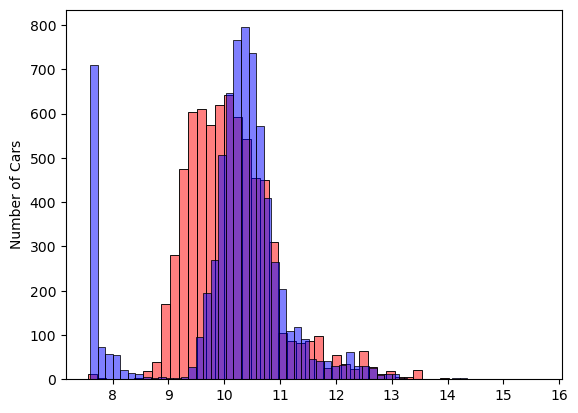

In [77]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)

sns.histplot(y_train, color = 'blue', alpha = 0.5, bins = 50)

plt.ylabel('Number of Cars')

plt.show()

**It seems the predicted values are below the real values. At first glance, the model does not seem ideal**

## RMSE - Root Mean Squared Error

The Root Mean Square Error (RMSE) is one way of evaluating regression models. RMSE is like a score for how well your model makes predictions.

$$
RMSE = \sqrt{\frac{1}{m} \sum_{i=1}^m{(g(x_{i}) - y_i)^2}}
$$

In [80]:
def rmse(y, y_pred):
    
    # error = y - y_pred
    # sq_error = error ** 2
    mse = ((y - y_pred) ** 2).mean()
    
    return np.sqrt(mse) 

In [79]:
rmse(y_train, y_pred)

0.7516513575450755

## Validating the model

In [81]:
# columns that we will use, as defined aboved
base

['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']

Create a function, **prepare_X**, can be used to apply transformations across the train, validation and test datasets.

In [82]:
def prepare_X(df):
    # pick the columns defined in base
    df_num = df[base]               
    
    # fill the null values
    df_num = df_num.fillna(0)       
    
    # extract the feature matrix to a numpy array
    X = df_num.values               
    
    return X

In [83]:
# Apply the transformations on the train dataset
X_train = prepare_X(df_train)

# coeficients 
w0, w = train_linear_regression(X_train, y_train)

In [84]:
#Apply the transformation on the validation dataset
X_val = prepare_X(df_val)

# Get the predictions using the feature matrix computed from the validation dataset
y_pred = w0 + X_val.dot(w)

In [ ]:
# Use the y_val that was obtained when we split the dataset in 60-20-20
y_val

array([10.82039809, 10.26189599, 11.55332817, ...,  7.60140233,
        9.9665093 ,  7.60140233])

Compute the RSME on the validation data set to evaluate the quality of our model and work on how we can improve the model

In [87]:
rmse(y_val, y_pred)

0.7388910917135363

The training dataset predictions had an RMSE of 0.752. The validation dataset has an RMSE of 0.739. Let's transform back $y_{val}$ and $y_{pred}$ and calculate the RMSE in the original values (price).

In [94]:
rmse(np.expm1(y_val), np.expm1(y_pred))

28261.263209718818

The RMSE is a measure for the average prediction error. The value that we found, 28.261, means that on average our predictions are off by a price of 28.261 USD. Let's calculate the RMSE if we always predicted the mean of the dataset:

In [95]:
rmse(np.expm1(y_val), np.expm1(y_val.mean()))

46233.76188314943

This demonstrates that our linear regression model is not very good as it cannot beat a very naive prediction strategy like always predicting the mean.

## Simple feature engineering

The **year** is an important variable when evaluating the price of a car. Instead of using it as an year, we can compute the age of the car. 

Note: The data was collected in 2017

In [88]:
2017 - df_train['year']

0        2
1        4
2       20
3        0
4        2
        ..
7145     8
7146     0
7147    11
7148     0
7149    22
Name: year, Length: 7150, dtype: int64

Add this transformation to the prepare_X function

In [89]:
def prepare_X(df):
    df = df.copy()      # I only work with a copy of my data set inside this function. 
                        # This allows me to keep my original data,
                        # Avoiding that this function changes my data
        
    df['age'] = 2017 - df['year']
    
    features = base + ['age']
    
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [90]:
X_train = prepare_X(df_train)

In [91]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5066198222867881

The model improved with the RMSE going from 0.76 to 0.51!

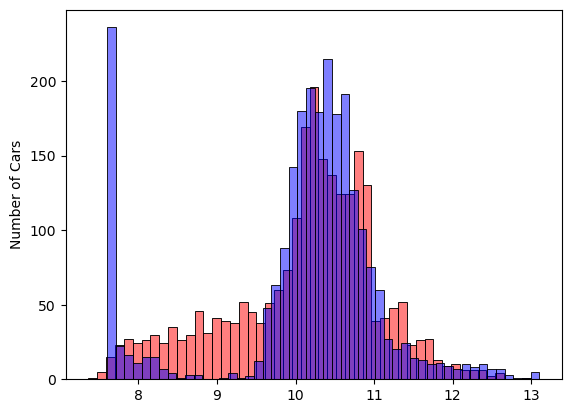

In [93]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)
plt.ylabel('Number of Cars')
plt.show()

## Categorical variables

Variables that are not numerical. The number of doors for example should be categorical instead of numerical.

Categorical columns can be encoded by creating binary columns for each category.

In [96]:
# Use astype() to create our binary column
(df_train.number_of_doors == 2).astype('int')

0       0
1       0
2       1
3       0
4       0
       ..
7145    0
7146    0
7147    0
7148    1
7149    0
Name: number_of_doors, Length: 7150, dtype: int32

In [99]:
# We can discover the possible bumber of doors with unique()

df_train.number_of_doors.unique()

array([ 4.,  2.,  3., nan])

Add the logic to the prepare_X function

In [107]:
def prepare_X(df):
    df = df.copy() # I only work with a copy of my data set inside this function. This allows me to keep my original data
    features = base.copy() # Avoiding that this functions changes my data
        
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for value in [2, 3, 4]:
        df['num_of_doors_%s' % value] = (df['number_of_doors'] == value).astype('int')
        features.append('num_of_doors_%s' % value)  # want to add these features to the list of features to put it in the matrix X down below
    
    
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [108]:
prepare_X(df_train)

array([[355.,   8.,  22., ...,   0.,   0.,   1.],
       [256.,   6.,  21., ...,   0.,   0.,   1.],
       [ 93.,   4.,  34., ...,   1.,   0.,   0.],
       ...,
       [245.,   6.,  25., ...,   0.,   0.,   1.],
       [370.,   6.,  29., ...,   1.,   0.,   0.],
       [135.,   6.,  22., ...,   0.,   1.,   0.]])

We can see the binary columns for the multiple number of doors in the last 3 columns of the df_train array

In [109]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5045363133501558

The improvement was very small.The number of doors is not a very usefull feature.

Let's try with a new variable: **make**

In [113]:
#let's look at the top 5 manufactors 
df.make.value_counts().head(5)

make
chevrolet     1123
ford           881
volkswagen     809
toyota         746
dodge          626
Name: count, dtype: int64

In [114]:
makes = list(df.make.value_counts().head(5).index)

In [115]:
def prepare_X(df):
    df = df.copy()      # I only work with a copy of my data set inside this function. This allows me to keep my original data
    features = base.copy()                    # Avoiding that this functions changes my data
        
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for value in [2, 3, 4]:
        df['num_of_doors_%s' % value] = (df['number_of_doors'] == value).astype('int')
        features.append('num_of_doors_%s' % value) 
    
    for value in makes:
        df['make_%s' % value] = (df['make'] == value).astype('int')
        features.append('make_%s' % value)
    
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [116]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4998184176120506

Again, a very small improvement...

Let's look at the other variables.

In [119]:
df_train.dtypes[df_train.dtypes == 'object']

make                 object
model                object
engine_fuel_type     object
transmission_type    object
driven_wheels        object
market_category      object
vehicle_size         object
vehicle_style        object
dtype: object

In [120]:
categorical_variables = [
    'make', 'engine_fuel_type', 'transmission_type', 'driven_wheels', 
    'market_category', 'vehicle_size', 'vehicle_style'
]

Repeat the process and get the top 5 values of each category  

In [121]:
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [122]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [124]:
def prepare_X(df):
    df = df.copy()      
    features = base.copy()                  
        
    df['age'] = 2017 - df['year']
    features.append('age')
    
    for value in [2, 3, 4]:
        df['num_of_doors_%s' % value] = (df['number_of_doors'] == value).astype('int')
        features.append('num_of_doors_%s' % value)
        
    for value in makes:
        df['make_%s' % value] = (df['make'] == value).astype('int')
        features.append('make_%s' % value)
    
    for c, values in categories.items():
        for v in values:  
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c, v))
    
    df_num = df[features]
    
    df_num = df_num.fillna(0)
    
    X = df_num.values
    
    return X

In [125]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

26041.122680928933

The RMSE exploded. Also the weights are higher.

In [127]:
w0, w

(2.542108003008796e+16,
 array([-1.73354117e+02,  2.38277523e+04,  1.89289521e+03,  2.78287030e+02,
         8.94140957e-02, -6.69339809e+01, -4.76065629e+05, -4.75963461e+05,
        -4.75767975e+05, -8.08974900e+18,  2.45798188e+18, -2.97963218e+18,
        -3.07230027e+18, -4.83567061e+18,  8.08974900e+18, -2.45798188e+18,
         2.97963218e+18,  3.07230027e+18,  4.83567061e+18,  4.78039595e+02,
         5.08347462e+02,  4.57642595e+02,  2.86273317e+02,  3.81085868e+02,
        -5.97983440e+16, -5.97983440e+16, -5.97983440e+16, -5.97983440e+16,
        -5.97983440e+16,  3.43772640e+16,  3.43772640e+16,  3.43772640e+16,
         3.43772640e+16, -4.25896928e-01, -1.24864375e+01, -3.96455277e+00,
        -1.53800153e+01, -2.03858236e+01, -4.14042984e+02, -3.99271047e+02,
        -3.86614824e+02, -5.03299884e-02,  5.70824986e-02,  1.90633215e-01,
         3.33575084e-01, -1.65335640e-01]))

We wanted to improve our model by adding more variables but we only made it worse

## Regularization

First, let's understand what has happened. Let's consider the Normal Equation:

$$
\mathbf{w} \approx (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

The first part $(\mathbf{X}^T \mathbf{X})^{-1}$ only exists if the matrix has full rank. This means that $\mathbf{X}^T \mathbf{X}$ must be invertible, which requires that the columns of $\mathbf{X}$ are linearly independent. Let's look at an example where the columns of $\mathbf{X}$ are not linearly independent.

If some features in the X matrix are duplicates, in this case, usually the $(\mathbf{X}^T \mathbf{X})^{-1}$ doesn't exist.

In [128]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 5, 5],
    [4, 5, 5],
]

X = np.array(X)

X.T.dot(X)

array([[140, 111, 111],
       [111, 108, 108],
       [111, 108, 108]])

The last two columns are the same.

If we try to calculate the inverse, it doesn't exist.

In [129]:
np.linalg.inv(X.T.dot(X))

LinAlgError: Singular matrix

Let's add noise in to the matrix, and change one number by a very small amount.

In [130]:
X = [
    [4, 4, 4],
    [3, 5, 5],
    [5, 1, 1],
    [5, 4, 4],
    [7, 500000001, 5],
    [4, 5, 5.00000001],
]

X = np.array(X)
X.T.dot(X)

array([[1.40000000e+02, 3.50000008e+09, 1.11000000e+02],
       [3.50000008e+09, 2.50000001e+17, 2.50000009e+09],
       [1.11000000e+02, 2.50000009e+09, 1.08000000e+02]])

With noisy data, there can be features that are very similar. This matrix is not exactly singular anymore. The third column is not a duplicated of the second, and vice-versa

It become numerically invertable

In [131]:
XTX = X.T.dot(X)
XTX_inv = np.linalg.inv(XTX)
XTX_inv

array([[ 4.67079347e-02, -2.26223975e-10, -4.27687110e-02],
       [-2.26223975e-10,  6.30050657e-18,  8.66629096e-11],
       [-4.27687110e-02,  8.66629096e-11,  5.12099041e-02]])

The matrix becomes numerically invertable but we still see very large numbers.

In [132]:
y = [1, 2, 3, 1, 2, 3]
XTX_inv.dot(X.T).dot(y)

array([ 4.22059651e-01, -2.38154194e-09,  4.72706838e-02])

When we multiply by the y vector, we still see very large numbers for the second and third feature. In spite of being invertable, the distortion in the training data leads to huge errors.

To solve this problem, add a small number to the diagonal of the Xᵀ · X matrix

Let's test with a smaller example with a new Xᵀ · X matrix

In [133]:
# Second column is a similar duplicate of the third column

XTX = [
    [1, 2, 2],
    [2, 1, 1.0000001],
    [2, 1.0000001, 1]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33333356e-01,  3.33333339e-01,  3.33333339e-01],
       [ 3.33333339e-01, -5.00000008e+06,  4.99999991e+06],
       [ 3.33333339e-01,  4.99999991e+06, -5.00000008e+06]])

What we can do, is add a small number to the diagonal of this matrix. This will make reduce the chance that the matrix is singular.

In [134]:
XTX = [
    [1.0001, 2, 2],
    [2, 1.0001, 1.0000001],
    [2, 1.0000001, 1.0001]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[-3.33366691e-01,  3.33350007e-01,  3.33350007e-01],
       [ 3.33350007e-01,  5.00492166e+03, -5.00508835e+03],
       [ 3.33350007e-01, -5.00508835e+03,  5.00492166e+03]])

**The larger the number we add to the diagonal, the more control we have on the weights:**

In [135]:
XTX = [
    [1.01, 2, 2],
    [2, 1.01, 1.0000001],
    [2, 1.0000001, 1.01]
]

XTX = np.array(XTX)
np.linalg.inv(XTX)

array([[ -0.33668908,   0.33501399,   0.33501399],
       [  0.33501399,  49.91590897, -50.08509104],
       [  0.33501399, -50.08509104,  49.91590897]])

To implement regularization create an identity matrix with np.eye().
Multiply it with the regularization parameter.
Add the resultant matrix to the Gram Matrix.

In [136]:
XTX = XTX + (0.01 * np.eye(3))
XTX

array([[1.02     , 2.       , 2.       ],
       [2.       , 1.02     , 1.0000001],
       [2.       , 1.0000001, 1.02     ]])

When inverted, the problem disappears

In [137]:
np.linalg.inv(XTX)

array([[ -0.34009026,   0.33672302,   0.33672302],
       [  0.33672302,  24.91426063, -25.08598937],
       [  0.33672302, -25.08598937,  24.91426063]])

Regularization is a way of controlling the weights. Let's update our `train_linear_regression` function:

In [138]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + (r * np.eye(XTX.shape[0]))
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [139]:
X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = 0.01)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.45695242845845585

The model improved, and even better than the non-regularized form before it had the encoded variables

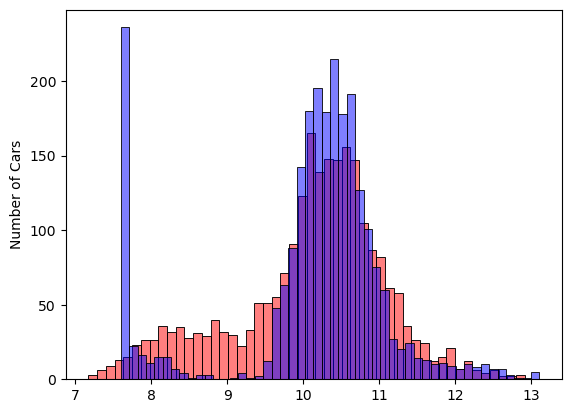

In [141]:
sns.histplot(y_pred, color = 'red', alpha = 0.5, bins = 50)
sns.histplot(y_val, color = 'blue', alpha = 0.5, bins = 50)
plt.ylabel('Number of Cars')
plt.show()

## Tuning the model

The goal is to find the best parameters for $r$:

In [142]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression_reg(X_train, y_train, r = r)

    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    
    print(r, w0, score)

0.0 2.542108003008796e+16 26041.122680928933
1e-05 4.150940725698545 0.4569553441179565
0.0001 6.337426352531553 0.4569553553462918
0.001 6.33899399063378 0.4569550749196469
0.1 6.230314912487044 0.4569406896853755
1 5.625592848338431 0.45747537136207506
10 4.270265453483731 0.47099274259210205


Without regularization, bias term is huge and rmse as well. With a little bit of regularization, score improves strongly. Towards regularization alpha of 10, it degrades again. We will pick 0.001 for model training:

In [143]:
r = 0.001

X_train = prepare_X(df_train)
w0, w = train_linear_regression_reg(X_train, y_train, r = r)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

score = rmse(y_val, y_pred)
    
score

0.4569550749196469

## Using the model